SIN-392 - Introdução ao Processamento Digital de Imagens (2022-1)

# Aula 04 - Tansformações de intensidade I (Parte 2)

Prof. João Fernando Mari ([*joaofmari.github.io*](https://joaofmari.github.io/))

---

<h1>Índice<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importando-as-bibliotecas-necessárias" data-toc-modified-id="Importando-as-bibliotecas-necessárias-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importando as bibliotecas necessárias</a></span></li><li><span><a href="#Carregando-uma-imagem" data-toc-modified-id="Carregando-uma-imagem-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Carregando uma imagem</a></span></li><li><span><a href="#Gerando-imagens-com-caracteristicas-diferentes" data-toc-modified-id="Gerando-imagens-com-caracteristicas-diferentes-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Gerando imagens com caracteristicas diferentes</a></span><ul class="toc-item"><li><span><a href="#Imagem-clara" data-toc-modified-id="Imagem-clara-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Imagem clara</a></span></li><li><span><a href="#Imagem-escura" data-toc-modified-id="Imagem-escura-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Imagem escura</a></span></li><li><span><a href="#Imagem-de-baixo-contraste" data-toc-modified-id="Imagem-de-baixo-contraste-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Imagem de baixo contraste</a></span></li><li><span><a href="#Plotando-as-funções" data-toc-modified-id="Plotando-as-funções-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Plotando as funções</a></span></li><li><span><a href="#Plotando-as-imagens" data-toc-modified-id="Plotando-as-imagens-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Plotando as imagens</a></span></li><li><span><a href="#Informações-sobre-as-imagens" data-toc-modified-id="Informações-sobre-as-imagens-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Informações sobre as imagens</a></span></li></ul></li><li><span><a href="#Funções-lineares-por-parte" data-toc-modified-id="Funções-lineares-por-parte-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Funções lineares por parte</a></span><ul class="toc-item"><li><span><a href="#Carrega-uma-imagem" data-toc-modified-id="Carrega-uma-imagem-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Carrega uma imagem</a></span></li><li><span><a href="#Definição-dos-pontos-de-controle" data-toc-modified-id="Definição-dos-pontos-de-controle-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Definição dos pontos de controle</a></span></li><li><span><a href="#Plotando-a-função-linear-por-partes" data-toc-modified-id="Plotando-a-função-linear-por-partes-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Plotando a função linear por partes</a></span></li><li><span><a href="#Aplicando-a-função-de-transformação" data-toc-modified-id="Aplicando-a-função-de-transformação-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Aplicando a função de transformação</a></span></li></ul></li><li><span><a href="#Alargamento-de-contraste" data-toc-modified-id="Alargamento-de-contraste-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Alargamento de contraste</a></span><ul class="toc-item"><li><span><a href="#Valores-mínimos-e-máximos-na-imagem" data-toc-modified-id="Valores-mínimos-e-máximos-na-imagem-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Valores mínimos e máximos na imagem</a></span></li><li><span><a href="#Especificando-valores-mínimos-e-máximos" data-toc-modified-id="Especificando-valores-mínimos-e-máximos-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Especificando valores mínimos e máximos</a></span></li><li><span><a href="#Aplicando-a-função-de-transformação" data-toc-modified-id="Aplicando-a-função-de-transformação-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Aplicando a função de transformação</a></span></li><li><span><a href="#Plotando-as-imagens-na-tela" data-toc-modified-id="Plotando-as-imagens-na-tela-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Plotando as imagens na tela</a></span></li></ul></li><li><span><a href="#Referencias" data-toc-modified-id="Referencias-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Referencias</a></span></li></ul></div>

## Importando as bibliotecas necessárias

In [1]:
import numpy as np

from skimage import util, color

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib notebook
SMALL_SIZE = 7
matplotlib.rc('font', size=SMALL_SIZE)
matplotlib.rc('axes', titlesize=SMALL_SIZE)

## Carregando uma imagem

In [2]:
img_gray = plt.imread('./images/boat.tif')

print(img_gray.shape, img_gray.dtype, img_gray.min(), img_gray.max())

(512, 512) uint8 0 239


Lista com o possíveis valores de intensidade

In [3]:
# Inteiro de 8 bits sem sinal
r = np.array(np.linspace(0, 255, 256))

# Float
# 256 valores, apenas para fins de vizualização.
r_ = np.array(np.linspace(0, 1, 256))

### print(r_)

## Gerando imagens com caracteristicas diferentes

Imagem clara, imagem escura e imagem de baixo contraste. A imagem original possui alto contraste.

### Imagem clara

In [4]:
# Define o valor do gama
gama_02 = 0.2

# Transformação gama
img_gray_clara = util.img_as_ubyte(util.img_as_float(img_gray) ** gama_02)

s_clara = r_ ** gama_02 * 255

### Imagem escura

In [5]:
# Define o valor do gama
gama_40 = 4.0

# Transformação gama
img_gray_escura = util.img_as_ubyte(util.img_as_float(img_gray) ** gama_40)

s_escura = r_ ** gama_40 * 255

### Imagem de baixo contraste

In [6]:
# Função linear - diminui o contraste

# Transformação linear
img_gray_baixo = img_gray * 0.25 + 95

s_baixo = r * 0.25 + 95

### Plotando as funções 

In [7]:
s_list = [r, s_clara, s_escura, s_baixo]

title_list = ['Original', 'Clara', 'Escura', 'Baixo Constraste']

<IPython.core.display.Javascript object>


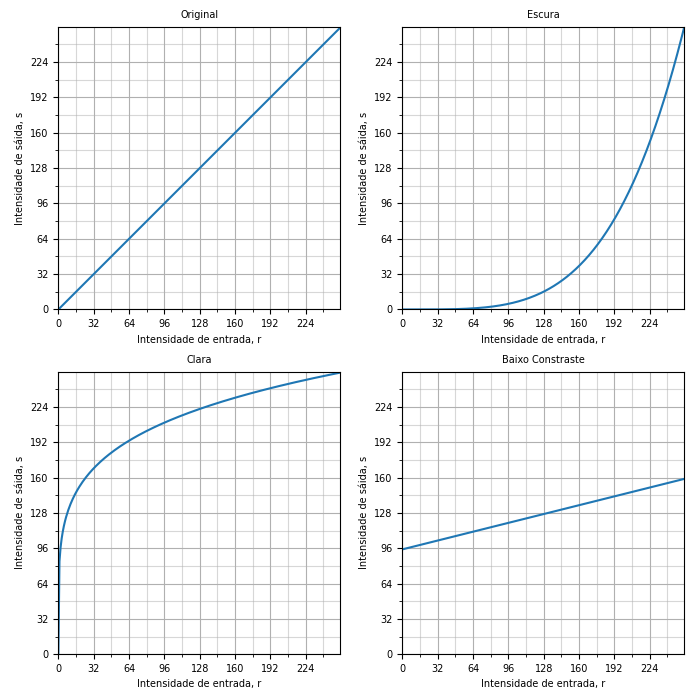

In [8]:
fig, ax  = plt.subplots(2, 2, figsize=(7, 7))
for i, s in enumerate(s_list):
    ch_ = ax[i%2, i//2].plot(r, s)

    ax[i%2, i//2].autoscale(enable=True, axis='both', tight=True)
    ### ax[i] = fig.gca()
    ax[i%2, i//2].set_xticks(np.arange(0, 256, 32), minor=False)
    ax[i%2, i//2].set_xticks(np.arange(0, 256, 16), minor=True)
    ax[i%2, i//2].set_yticks(np.arange(0, 256, 32), minor=False)
    ax[i%2, i//2].set_yticks(np.arange(0, 256, 16), minor=True)
    ax[i%2, i//2].set_aspect('equal')
    ax[i%2, i//2].grid(which='major', alpha=1.0)
    ax[i%2, i//2].grid(which='minor', alpha=0.5)
    ax[i%2, i//2].set_ylim(0, 256)
    ax[i%2, i//2].set_xlabel('Intensidade de entrada, r', fontsize='medium')
    ax[i%2, i//2].set_ylabel('Intensidade de sáida, s', fontsize='medium')
    ax[i%2, i//2].set_title(title_list[i])
    
plt.tight_layout()
plt.show()

### Plotando as imagens

In [9]:
# Lista Python contendo as imagens com diferentes distribuições de intensidade.
img_list = [img_gray, img_gray_clara, img_gray_escura, img_gray_baixo]

<IPython.core.display.Javascript object>


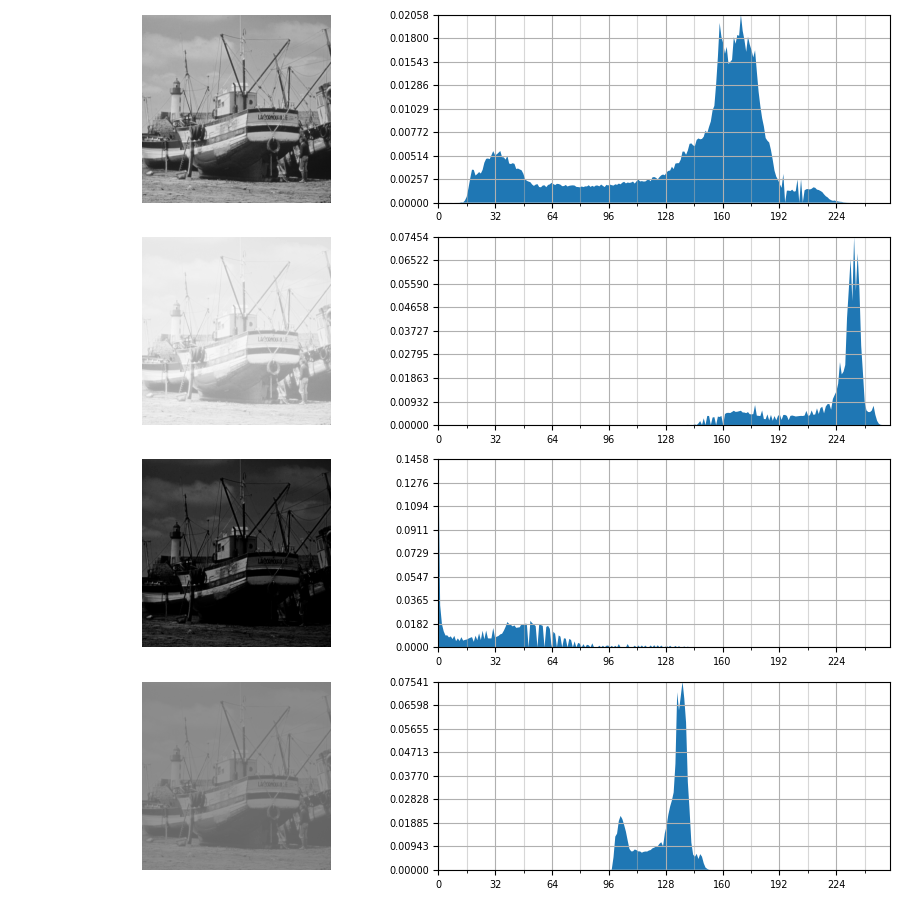

In [10]:
# Figura com 4 linha e 2 colunas
fig, ax = plt.subplots(4, 2, figsize=(9, 9))
for i, img in enumerate(img_list):
    # Plota imagem
    img_ = ax[i, 0].imshow(img, cmap='gray', vmin=0, vmax=255)
    ax[i, 0].axis('off')
    
    # Computa o histograma normalizado
    hist, bins = np.histogram(img, bins=256, range=(0, 255))
    hist_norm = hist / (img.shape[0] * img.shape[1])
    
    # Plota histograma
    ch_ = ax[i, 1].fill_between(bins[:-1], hist_norm)
    ax[i, 1].autoscale(enable=True, axis='both', tight=True)
    ax[i, 1].set_xticks(np.arange(0, 256, 32), minor=False)
    ax[i, 1].set_xticks(np.arange(0, 256, 16), minor=True)
    ax[i, 1].set_yticks(np.arange(0, hist_norm.max()+0.01, hist_norm.max()/8), minor=False)
    ax[i, 1].set_yticks(np.arange(0, hist_norm.max()+0.01, hist_norm.max()/4), minor=True)
    #ax[i, 1].set_aspect('equal')
    ax[i, 1].grid(which='major', alpha=1.0)
    ax[i, 1].grid(which='minor', alpha=0.5)
    ax[i, 1].set_ylim(0, hist_norm.max())
    ### ax[i, 1].set_xlabel('Intensidades da imagem', fontsize='medium')
    ### ax[i, 1].set_ylabel('Histograma', fontsize='medium')
    
plt.tight_layout()
plt.show()

### Informações sobre as imagens

In [11]:
print(img_gray.shape, img_gray.dtype, img_gray.min(), img_gray.max())
print(img_gray_clara.shape, img_gray_clara.dtype, img_gray_clara.min(), img_gray_clara.max())
print(img_gray_escura.shape, img_gray_escura.dtype, img_gray_escura.min(), img_gray_escura.max())
print(img_gray_baixo.shape, img_gray_baixo.dtype, img_gray_baixo.min(), img_gray_baixo.max())

(512, 512) uint8 0 239
(512, 512) uint8 0 252
(512, 512) uint8 0 197
(512, 512) float64 95.0 154.75


## Funções lineares por parte
-----

### Carrega uma imagem

In [12]:
img_gray = plt.imread('./images/boat.tif')

# Plota informações sobre as imagens
print(img_gray.shape, img_gray.dtype, img_gray.min(), img_gray.max())

(512, 512) uint8 0 239


### Definição dos pontos de controle

In [13]:
## pts_r = [0, 50, 100, 150, 180,  200, 255] # Obrigatório ter o 0 e o 256.
## pts_s = [10, 20, 40, 50, 70, 90, 100]

pts_r = [0, 32, 64, 128, 256] # Obrigatório ter o 0 (ínicio) e o 256 (no final).
pts_s = [0, 16, 80, 142, 200]

pts_r = [0, 32, 64, 160, 256] # Obrigatório ter o 0 (ínicio) e o 256 (no final).
pts_s = [0, 16, 96, 112, 200]

### Plotando a função linear por partes

<IPython.core.display.Javascript object>


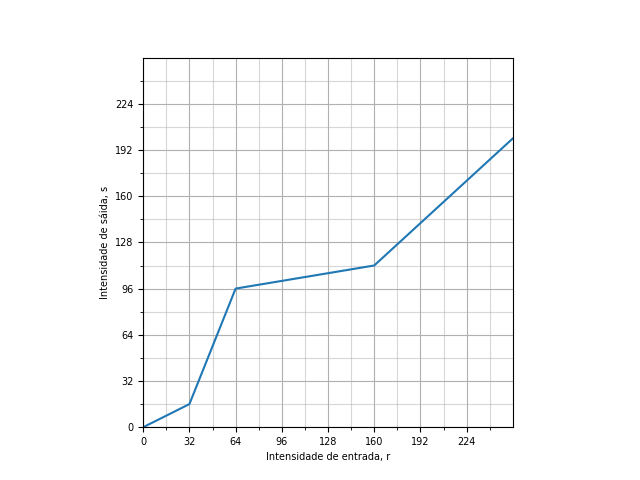

In [14]:
fig = plt.figure()
plt.plot(pts_r, pts_s)
    
plt.autoscale(enable=True, axis='both', tight=True)
ax = fig.gca()
ax.set_xticks(np.arange(0, 256, 32))
ax.set_xticks(np.arange(0, 256, 16), minor=True)
ax.set_yticks(np.arange(0, 256, 32), minor=False)
ax.set_yticks(np.arange(0, 256, 16), minor=True)
ax.set_aspect('equal')
ax.grid(which='major', alpha=1.0)
ax.grid(which='minor', alpha=0.5)
ax.set_ylim(0, 256)
ax.set_xlabel('Intensidade de entrada, r', fontsize='medium')
ax.set_ylabel('Intensidade de sáida, s', fontsize='medium')

plt.show()

### Aplicando a função de transformação

In [15]:
# Obs. Apenas para funções lineares motonicamente crescentes.

img_out = np.zeros(img_gray.shape, dtype=img_gray.dtype)
for i, (pt_r, pt_s) in enumerate(zip(pts_r[:-1], pts_s[:-1])):
    # Apenas os pixels com valor entre pts_r[i] e pts_r[i+1]
    # (max(s) - min(s)) * ...
    # ((r - min(r)) / ...
    # (max(r) - min(r)) + min(s)
    img_out[np.where(np.logical_and(img_gray >= pts_r[i], img_gray < pts_r[i+1]))] = \
            (pts_s[i+1] - pts_s[i]) * \
            ((img_gray[np.where(np.logical_and(img_gray >= pts_r[i], img_gray < pts_r[i+1]))] - pts_r[i]) / \
            (pts_r[i+1] - pts_r[i]) ) + pts_s[i]

<IPython.core.display.Javascript object>


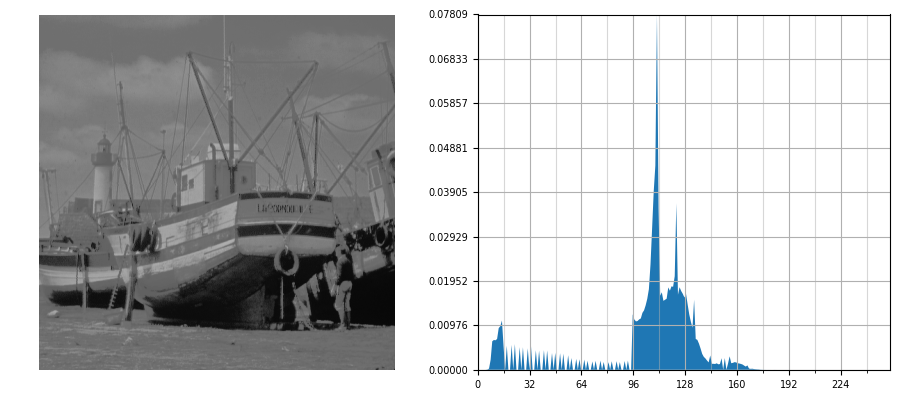

In [16]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(9, 4))
# Plota imagem original
img_ = ax1.imshow(img_out, cmap='gray', vmin=0, vmax=255)
ax1.axis('off')

# Computa o histograma normalizado
hist, bins = np.histogram(img_out, bins=256, range=(0, 255))
hist_norm = hist / (img_out.shape[0] * img_out.shape[1])

# Plota histograma
ch_ = ax2.fill_between(bins[:-1], hist_norm)
ax2.autoscale(enable=True, axis='both', tight=True)
ax2.set_xticks(np.arange(0, 256, 32), minor=False)
ax2.set_xticks(np.arange(0, 256, 16), minor=True)
ax2.set_yticks(np.arange(0, hist_norm.max()+0.01, hist_norm.max()/8), minor=False)
ax2.set_yticks(np.arange(0, hist_norm.max()+0.01, hist_norm.max()/4), minor=True)
#ax[i, 1].set_aspect('equal')
ax2.grid(which='major', alpha=1.0)
ax2.grid(which='minor', alpha=0.5)
ax2.set_ylim(0, hist_norm.max())
### ax[i, 1].set_xlabel('Intensidades da imagem', fontsize='medium')
### ax[i, 1].set_ylabel('Histograma', fontsize='medium')

plt.tight_layout()
plt.show()

## Alargamento de contraste
----

### Valores mínimos e máximos na imagem

In [17]:
# ==================================================
# ***** Escolha a imagem de entrada *****
# ==================================================
# ['orig', 'clara', 'escura', 'baixo']
input_image = 'clara' 

In [18]:
if input_image == 'orig':
    img_gray_ = img_gray

elif input_image == 'clara':
    img_gray_ = img_gray_clara

elif input_image == 'escura':
    img_gray_ = img_gray_escura

elif input_image == 'baixo':
    img_gray_ = img_gray_baixo

pts_r = [0, img_gray_.min(), img_gray_.max(), 256] # Obrigatório ter o 0 e o 256.
pts_s = [0, 0, 256, 256]

<IPython.core.display.Javascript object>


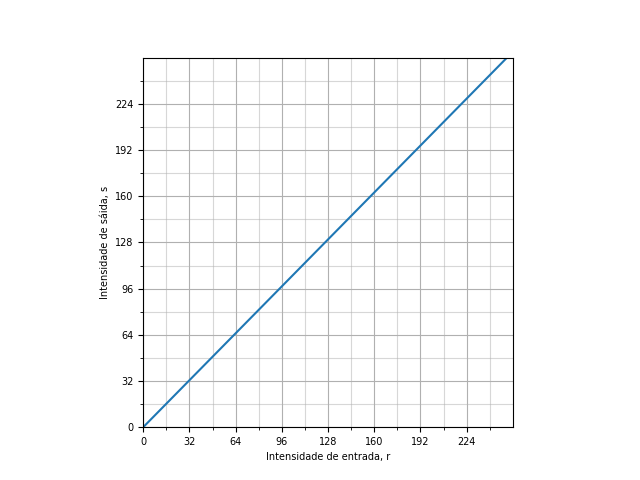

In [19]:
fig = plt.figure()
plt.plot(pts_r, pts_s)
    
plt.autoscale(enable=True, axis='both', tight=True)
ax = fig.gca()
ax.set_xticks(np.arange(0, 256, 32))
ax.set_xticks(np.arange(0, 256, 16), minor=True)
ax.set_yticks(np.arange(0, 256, 32), minor=False)
ax.set_yticks(np.arange(0, 256, 16), minor=True)
ax.set_aspect('equal')
ax.grid(which='major', alpha=1.0)
ax.grid(which='minor', alpha=0.5)
ax.set_ylim(0, 256)
ax.set_xlabel('Intensidade de entrada, r', fontsize='medium')
ax.set_ylabel('Intensidade de sáida, s', fontsize='medium')

plt.show()

In [20]:
# Obs. Apenas para funções lineares motonicamente crescentes.

img_out = np.zeros(img_gray_.shape, dtype=img_gray_.dtype)
for i, (pt_r, pt_s) in enumerate(zip(pts_r[:-1], pts_s[:-1])):
    # Apenas os pixels com valor entre pts_r[i] e pts_r[i+1]
    # (max(s) - min(s)) * ...
    # ((r - min(r)) / ...
    # (max(r) - min(r)) + min(s)
    img_out[np.where(np.logical_and(img_gray_ >= pts_r[i], img_gray_ < pts_r[i+1]))] = \
            (pts_s[i+1] - pts_s[i]) * \
            ((img_gray_[np.where(np.logical_and(img_gray_ >= pts_r[i], img_gray_ < pts_r[i+1]))] - pts_r[i]) / \
            (pts_r[i+1] - pts_r[i]) ) + pts_s[i]

<IPython.core.display.Javascript object>


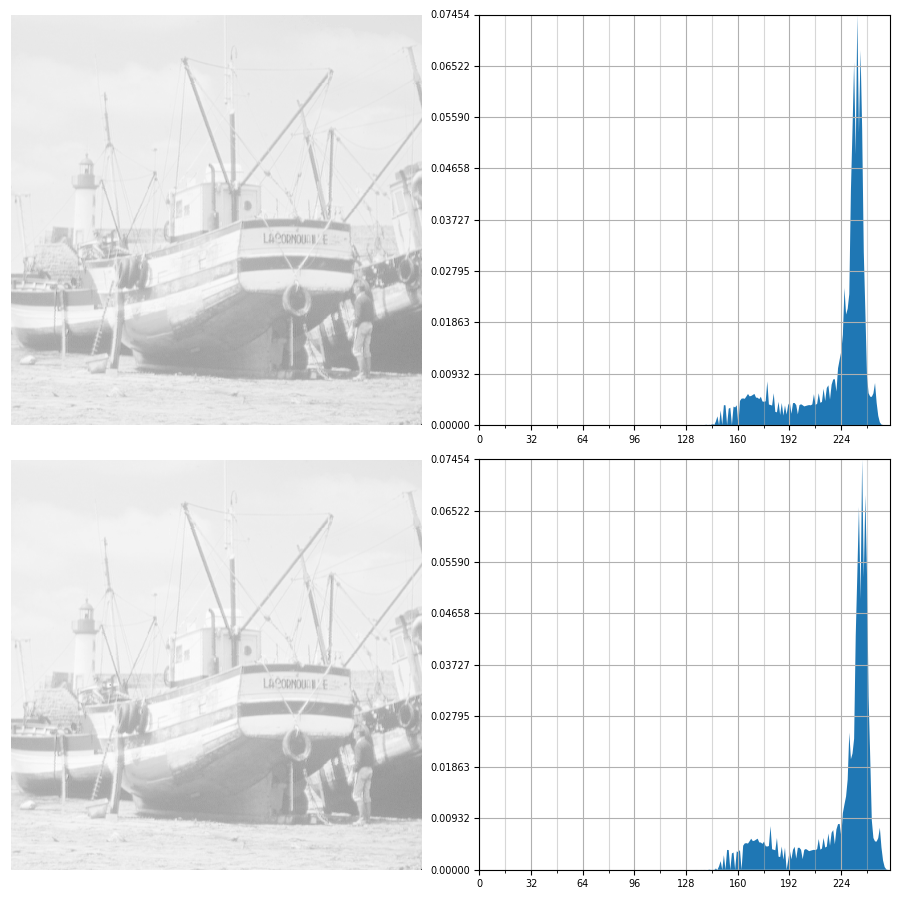

In [21]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9, 9))
# Plota imagem original
img_ = ax1.imshow(img_gray_, cmap='gray', vmin=0, vmax=255)
ax1.axis('off')

# Computa o histograma normalizado
hist, bins = np.histogram(img_gray_, bins=256, range=(0, 255))
hist_norm = hist / (img_gray_.shape[0] * img_gray_.shape[1])

# Plota histograma
ch_ = ax2.fill_between(bins[:-1], hist_norm)
ax2.autoscale(enable=True, axis='both', tight=True)
ax2.set_xticks(np.arange(0, 256, 32), minor=False)
ax2.set_xticks(np.arange(0, 256, 16), minor=True)
ax2.set_yticks(np.arange(0, hist_norm.max()+0.01, hist_norm.max()/8), minor=False)
ax2.set_yticks(np.arange(0, hist_norm.max()+0.01, hist_norm.max()/4), minor=True)
#ax[i, 1].set_aspect('equal')
ax2.grid(which='major', alpha=1.0)
ax2.grid(which='minor', alpha=0.5)
ax2.set_ylim(0, hist_norm.max())
### ax[i, 1].set_xlabel('Intensidades da imagem', fontsize='medium')
### ax[i, 1].set_ylabel('Histograma', fontsize='medium')

# Plota imagem após transformação
img_ = ax3.imshow(img_out, cmap='gray', vmin=0, vmax=255)
ax3.axis('off')

# Computa o histograma normalizado
hist, bins = np.histogram(img_out, bins=256, range=(0, 255))
hist_norm = hist / (img_gray_.shape[0] * img_gray_.shape[1])

# Plota histograma
ch_ = ax4.fill_between(bins[:-1], hist_norm)
ax4.autoscale(enable=True, axis='both', tight=True)
ax4.set_xticks(np.arange(0, 256, 32), minor=False)
ax4.set_xticks(np.arange(0, 256, 16), minor=True)
ax4.set_yticks(np.arange(0, hist_norm.max()+0.01, hist_norm.max()/8), minor=False)
ax4.set_yticks(np.arange(0, hist_norm.max()+0.01, hist_norm.max()/4), minor=True)
#ax4[i, 1].set_aspect('equal')
ax4.grid(which='major', alpha=1.0)
ax4.grid(which='minor', alpha=0.5)
ax4.set_ylim(0, hist_norm.max())
### ax[i, 1].set_xlabel('Intensidades da imagem', fontsize='medium')
### ax[i, 1].set_ylabel('Histograma', fontsize='medium')

plt.tight_layout()
plt.show()

### Especificando valores mínimos e máximos

In [22]:
# ==================================================
# ***** Escolha a imagem de entrada *****
# ==================================================
# ['orig', 'clara', 'escura', 'baixo']
input_image = 'clara' 

In [23]:
if input_image == 'orig':
    img_gray_ = img_gray
    pts_r = [0, 0, 256, 256] # Obrigatório ter o 0 e o 256.

elif input_image == 'clara':
    img_gray_ = img_gray_clara
    pts_r = [0, (255 * 0.5), img_gray_.max(), 256] # Obrigatório ter o 0 e o 256.

elif input_image == 'escura':
    img_gray_ = img_gray_escura
    pts_r = [0, img_gray_.min(), (255 * 0.5) ,256] # Obrigatório ter o 0 e o 256.

elif input_image == 'baixo':
    img_gray_ = img_gray_baixo
    pts_r = [0, (255 * 0.33), (255 * 0.66) ,256] # Obrigatório ter o 0 e o 256.

pts_s = [0, 0, 256, 256]

<IPython.core.display.Javascript object>


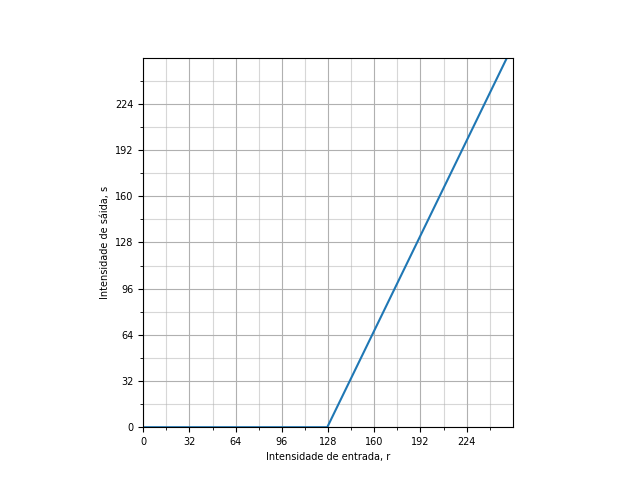

In [24]:
fig = plt.figure()
plt.plot(pts_r, pts_s)
    
plt.autoscale(enable=True, axis='both', tight=True)
ax = fig.gca()
ax.set_xticks(np.arange(0, 256, 32))
ax.set_xticks(np.arange(0, 256, 16), minor=True)
ax.set_yticks(np.arange(0, 256, 32), minor=False)
ax.set_yticks(np.arange(0, 256, 16), minor=True)
ax.set_aspect('equal')
ax.grid(which='major', alpha=1.0)
ax.grid(which='minor', alpha=0.5)
ax.set_ylim(0, 256)
ax.set_xlabel('Intensidade de entrada, r', fontsize='medium')
ax.set_ylabel('Intensidade de sáida, s', fontsize='medium')

plt.show()

### Aplicando a função de transformação

In [25]:
# Obs. Apenas para funções lineares motonicamente crescentes.

img_out = np.zeros(img_gray_.shape, dtype=img_gray_.dtype)
for i, (pt_r, pt_s) in enumerate(zip(pts_r[:-1], pts_s[:-1])):
    # Apenas os pixels com valor entre pts_r[i] e pts_r[i+1]
    # (max(s) - min(s)) * ...
    # ((r - min(r)) / ...
    # (max(r) - min(r)) + min(s)
    img_out[np.where(np.logical_and(img_gray_ >= pts_r[i], img_gray_ < pts_r[i+1]))] = \
            (pts_s[i+1] - pts_s[i]) * \
            ((img_gray_[np.where(np.logical_and(img_gray_ >= pts_r[i], img_gray_ < pts_r[i+1]))] - pts_r[i]) / \
            (pts_r[i+1] - pts_r[i]) ) + pts_s[i]

### Plotando as imagens na tela

<IPython.core.display.Javascript object>


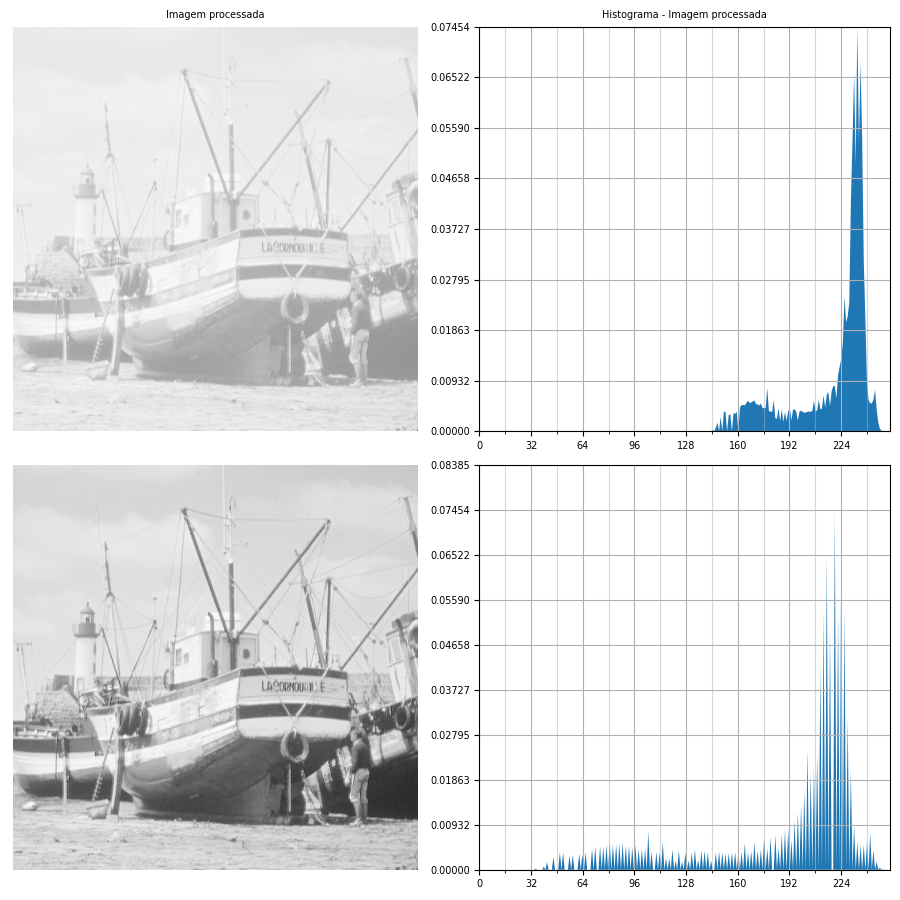

In [26]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9, 9))
# Plota imagem original
img_ = ax1.imshow(img_gray_, cmap='gray', vmin=0, vmax=255)
ax1.axis('off')
ax1.set_title('Imagem original')

# Computa o histograma normalizado
hist, bins = np.histogram(img_gray_, bins=256, range=(0, 255))
hist_norm = hist / (img_gray_.shape[0] * img_gray_.shape[1])

# Plota histograma
ch_ = ax2.fill_between(bins[:-1], hist_norm)
ax2.autoscale(enable=True, axis='both', tight=True)
ax2.set_xticks(np.arange(0, 256, 32), minor=False)
ax2.set_xticks(np.arange(0, 256, 16), minor=True)
ax2.set_yticks(np.arange(0, hist_norm.max()+0.01, hist_norm.max()/8), minor=False)
ax2.set_yticks(np.arange(0, hist_norm.max()+0.01, hist_norm.max()/4), minor=True)
#ax[i, 1].set_aspect('equal')
ax2.grid(which='major', alpha=1.0)
ax2.grid(which='minor', alpha=0.5)
ax2.set_ylim(0, hist_norm.max())
### ax[i, 1].set_xlabel('Intensidades da imagem', fontsize='medium')
### ax[i, 1].set_ylabel('Histograma', fontsize='medium')
ax2.set_title('Histograma - Imagem original')

# Plota imagem após transformação
img_ = ax3.imshow(img_out, cmap='gray', vmin=0, vmax=255)
ax3.axis('off')
ax1.set_title('Imagem processada')

# Computa o histograma normalizado
hist, bins = np.histogram(img_out, bins=256, range=(0, 255))
hist_norm = hist / (img_gray_.shape[0] * img_gray_.shape[1])

# Plota histograma
ch_ = ax4.fill_between(bins[:-1], hist_norm)
ax4.autoscale(enable=True, axis='both', tight=True)
ax4.set_xticks(np.arange(0, 256, 32), minor=False)
ax4.set_xticks(np.arange(0, 256, 16), minor=True)
ax4.set_yticks(np.arange(0, hist_norm.max()+0.01, hist_norm.max()/8), minor=False)
ax4.set_yticks(np.arange(0, hist_norm.max()+0.01, hist_norm.max()/4), minor=True)
#ax4[i, 1].set_aspect('equal')
ax4.grid(which='major', alpha=1.0)
ax4.grid(which='minor', alpha=0.5)
ax2.set_ylim(0, hist_norm.max())
### ax[i, 1].set_xlabel('Intensidades da imagem', fontsize='medium')
### ax[i, 1].set_ylabel('Histograma', fontsize='medium')
ax2.set_title('Histograma - Imagem processada')

plt.tight_layout()
plt.show()

## Referencias
---

* MARQUES FILHO, O.; VIEIRA NETO, H. Processamento digital de imagens. Brasport, 1999.
    * Disponível para download no site do autor (Exclusivo para uso pessoal)
    * http://dainf.ct.utfpr.edu.br/~hvieir/pub.html  

* GONZALEZ, R.C.; WOODS, R.E.; Processamento Digital de Imagens. 3ª edição. Editora Pearson, 2009.

* J. E. R. Queiroz, H. M. Gomes. Introdução ao Processamento Digital de Imagens. RITA. v. 13, 2006.
    * http://www.dsc.ufcg.edu.br/~hmg/disciplinas/graduacao/vc-2016.2/Rita-Tutorial-PDI.pdf  

* Universidade de Waterloo. Image Repository.
    * http://links.uwaterloo.ca/Repository.html
    
* The USC-SIPI Image Database    
    * http://sipi.usc.edu/database/database.php
    
* Gaël Varoquaux Emmanuelle Gouillart; Olav Vahtras; Pierre de Buyl (editores). Scipy Lecture Notes. Release 2020.1
    * Disponível em: http://scipy-lectures.org/

* scikit-image. Documentação.
    * https://scikit-image.org/docs/dev/index.html

* NumPy. Documentação.
    * https://numpy.org/doc/stable/